# Overview

Articles:
* https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

<b> Keywords:</b> Principal Component Analysis, etc...

# Notebook Set-Up

In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)           # prevents scientific notation

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import Data

In [3]:
pd.set_option('display.max_columns', None)

#census = pd.read_csv(r'\Users\Mattl\Desktop\Data\census.csv')
redfin = pd.read_csv(r'\Users\Mattl\Desktop\Data\redfin.csv')

data = redfin
display(data)

pd.set_option('display.max_columns', None)

print(data.shape)
print(data.columns)

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,12/1/2017,12/31/2017,30,county,5,396,f,"Larimer County, CO",NaN,Colorado,CO,Multi-Family (2-4 Unit),4,465000.000,-0.016,-0.065,359900.000,0.000,0.043,194.097,0.140,0.003,180.000,0.075,0.124,7.000,0.750,0.167,2.000,-0.667,-0.500,1.000,-0.857,-0.500,7.000,-0.222,-0.125,1.000,-1.300,-0.300,29.000,-31.000,-44.000,0.978,-0.013,-0.003,0.143,-0.107,-0.190,NaN,NaN,NaN,0.000,-0.333,0.000,"Fort Collins, CO",22660.000,3/19/2023
1,9/1/2017,9/30/2017,30,county,5,1515,f,"Winona County, MN",NaN,Minnesota,MN,Townhouse,13,163000.000,-0.167,NaN,140950.000,NaN,NaN,133.379,0.110,NaN,92.087,NaN,NaN,3.000,0.000,NaN,NaN,NaN,NaN,2.000,NaN,NaN,5.000,0.000,NaN,1.700,0.000,NaN,153.000,96.000,NaN,0.977,-0.018,NaN,0.000,-0.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Winona, MN",49100.000,3/19/2023
2,4/1/2022,4/30/2022,30,county,5,949,f,"Henry County, IA",NaN,Iowa,IA,All Residential,-1,93000.000,-0.333,-0.453,152400.000,0.282,0.219,68.226,-0.415,-0.501,135.549,0.261,0.210,9.000,-0.250,-0.400,4.000,-0.429,-0.556,15.000,0.250,0.667,35.000,0.207,0.061,3.900,1.500,1.700,102.000,16.000,39.000,0.961,-0.011,-0.022,0.222,0.056,-0.044,NaN,NaN,NaN,0.000,-0.143,0.000,Iowa nonmetropolitan area,NaN,3/19/2023
3,3/1/2012,3/31/2012,30,county,5,2396,f,"Lancaster County, PA",NaN,Pennsylvania,PA,Condo/Co-op,3,105805.000,-0.332,-0.288,178700.000,0.027,0.052,79.616,-0.075,-0.227,100.422,0.027,0.027,10.000,0.667,0.250,4.000,-0.200,0.333,11.000,-0.154,-0.421,70.000,-0.079,-0.333,7.000,-5.700,-6.100,249.000,137.000,139.000,0.944,-0.025,-0.024,0.200,0.033,0.075,NaN,NaN,NaN,0.250,-0.550,-0.083,"Lancaster, PA",29540.000,3/19/2023
4,8/1/2020,8/31/2020,30,county,5,1036,f,"Gove County, KS",NaN,Kansas,KS,All Residential,-1,49500.000,0.500,NaN,118500.000,0.491,NaN,22.098,0.223,NaN,51.529,-0.015,NaN,1.000,0.000,NaN,1.000,NaN,NaN,2.000,1.000,NaN,4.000,0.333,NaN,4.000,1.000,NaN,90.000,-79.000,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,0.000,NaN,NaN,Kansas nonmetropolitan area,NaN,3/19/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849755,3/1/2016,3/31/2016,30,county,5,1246,f,"East Baton Rouge Parish, LA",NaN,Louisiana,LA,Townhouse,13,152000.000,-0.049,0.130,210000.000,0.105,0.077,101.362,-0.111,-0.054,117.648,0.030,0.038,36.000,1.000,0.333,22.000,0.158,2.143,NaN,NaN,NaN,NaN,NaN,NaN,3.400,-3.400,-2.300,54.000,-84.000,-134.000,0.971,-0.004,-0.003,0.028,-0.083,-0.083,0.105,-0.050,NaN,0.227,0.069,0.227,"Baton Rouge, LA",12940.000,3/19/2023
849756,11/1/2018,11/30/2018,30,county,5,1709,f,"Washington County, MO",NaN,Missouri,MO,Single Family Residential,6,75000.000,-0.167,0.099,154900.000,0.833,0.111,59.512,0.025,0.025,106.252,0.937,0.529,11.000,-0.154,-0.083,5.000,0.250,0.667,8.000,-0.333,-0.273,47.000,-0.060,-0.145,4.300,0.500,-0.300,95.000,-51.000,-60.000,0.959,0.014,0.044,0.091,0.014,-0.076,NaN,NaN,NaN,0.000,0.000,0.000,Missouri nonmetropolitan area,NaN,3/19/2023


(849760, 58)
Index(['period_begin', 'period_end', 'period_duration', 'region_type',
       'region_type_id', 'table_id', 'is_seasonally_adjusted', 'region',
       'city', 'state', 'state_code', 'property_type', 'property_type_id',
       'median_sale_price', 'median_sale_price_mom', 'median_sale_price_yoy',
       'median_list_price', 'median_list_price_mom', 'median_list_price_yoy',
       'median_ppsf', 'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf',
       'median_list_ppsf_mom', 'median_list_ppsf_yoy', 'homes_sold',
       'homes_sold_mom', 'homes_sold_yoy', 'pending_sales',
       'pending_sales_mom', 'pending_sales_yoy', 'new_listings',
       'new_listings_mom', 'new_listings_yoy', 'inventory', 'inventory_mom',
       'inventory_yoy', 'months_of_supply', 'months_of_supply_mom',
       'months_of_supply_yoy', 'median_dom', 'median_dom_mom',
       'median_dom_yoy', 'avg_sale_to_list', 'avg_sale_to_list_mom',
       'avg_sale_to_list_yoy', 'sold_above_list', 'sold_above

##### PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
credit_amount,0.493,-0.156,0.030,0.088,0.305,-0.228,-0.187,-0.003,-0.061,-0.089,-0.014,0.017,0.119
duration,0.402,-0.135,-0.010,-0.173,0.190,-0.140,-0.230,-0.214,-0.160,-0.300,0.069,-0.049,0.147
job,0.393,-0.090,-0.243,0.081,-0.041,0.327,0.122,0.285,-0.002,0.130,0.149,0.096,-0.106
property_magnitude,0.371,-0.112,0.086,-0.047,-0.148,0.145,0.168,-0.266,-0.001,0.142,-0.053,-0.024,-0.028
residence_since,0.158,0.137,0.410,0.117,-0.494,-0.041,-0.130,-0.015,-0.020,-0.042,-0.013,0.125,0.185
age,0.154,0.350,0.215,0.038,-0.177,0.080,0.121,0.366,0.098,-0.130,-0.368,0.106,0.400
other_parties,0.144,-0.024,-0.173,0.335,-0.085,-0.143,0.610,-0.422,-0.179,0.116,-0.148,0.121,0.153
foreign_worker,0.123,-0.053,-0.134,-0.199,-0.218,0.145,-0.237,-0.298,0.251,0.022,-0.539,-0.476,-0.046
other_payment_plans,0.094,-0.018,0.134,-0.269,0.128,0.054,0.206,-0.180,0.732,-0.109,0.177,0.358,-0.016
housing,0.077,-0.242,0.301,0.224,-0.376,-0.030,-0.163,-0.108,0.027,0.305,0.367,-0.090,-0.200


,Component,Field
0,PC1,credit_amount
1,PC10,purpose
2,PC11,foreign_worker
3,PC12,foreign_worker
4,PC13,employment
5,PC2,credit_history
6,PC3,residence_since
7,PC4,installment_commitment
8,PC5,residence_since
9,PC6,savings_status


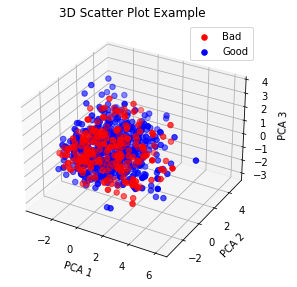

In [17]:
# function to plot pca componments into clusers by party labels
def pca_plot(df):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    ax.scatter(df[df['class'] == 1]['PC1'], df[df['class'] == 1]['PC2'], df[df['class'] == 1]['PC3'], c='red',  s=30, label = 'Bad')
    ax.scatter(df[df['class'] == 0]['PC1'], df[df['class'] == 0]['PC2'], df[df['class'] == 0]['PC3'], c='blue', s=30, label = 'Good')
    
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')
    _ = plt.title("3D Scatter Plot Example")
    _ = plt.legend()
    _ = plt.tight_layout()
    _ = plt.show()
    return _

#### PCA Function

from sklearn.decomposition import PCA
import numpy as np

def perform_pca(df_set, pca_param):

    pca_input = df_set.copy()

    pca = PCA(pca_param) # alternative PCA method which chooses least components for specified variance 
    x = pca_input.iloc[:, :-1] # set x to explanatory variables
    principalComponents = pca.fit_transform(x)
    
    pca_cols = []
    for i in range(0,pca.n_components_):
        pca_cols.append('PC'+str(i+1))
    
    principalDf = pd.DataFrame(data=principalComponents, columns=pca_cols).join(pca_input[['class']])
    
    #print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))
    
    # PCA Loadings
    loadings = pd.DataFrame(pca.components_.T, columns=pca_cols, index=pca_input.columns[0:-1]).sort_values(by=pca_cols, ascending = False)

    # most important factors    
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
    most_important_names = [features[most_important[i]] for i in range(pca.n_components_)]       # get the names
    dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(pca.n_components_)}        # create reference dict    
    pca_3_df = pd.DataFrame(sorted(dic.items()),columns = ['Component','Field']) # build the dataframe
    
    return loadings, pca_3_df, principalDf 

###################
# Plot Options
# pylab for 3d plot
#%pylab
%matplotlib inline  
display(perform_pca(freq_encoded_set_scaled[0], .80)[0])
model_sets(scale_set(freq_encoded_df),independent_vars,dependent_var)

display(perform_pca(freq_encoded_set_scaled[0], .80)[1])

pca_plot(perform_pca(freq_encoded_set_scaled[0], .80)[2])